# Introdução

O dataset em anexo contém informações baixadas em Tableau Free Public Datasets​, com a seguinte descrição:

Carga Global de Doenças - Estimando a carga de doenças, lesões e fatores de risco globalmente  nos anos de 1970 e 2010. Fonte: Instituto de Métricas e Avaliação de Saúde (IHME)


O conjunto de dados contém as seguintes colunas:

1. Country Code: Um código que representa o país.

2. Country Name: O nome do país.

3. Year: O ano dos dados.

4. Age Group: O grupo etário dos indivíduos.

5. Sex: O sexo dos indivíduos (Masculino, Feminino, Ambos).

6. Number of Deaths: O número de mortes.

7. Death Rate Per 100,000: A taxa de mortalidade por 100.000 indivíduos.

O objetivo desse notebook é fazer uma análise exploratória com algumas perguntas para compreender melhor o comportamento dos dados, identificar padrões, tendências, discrepâncias e levantar hipóteses.


# Análise geral do Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
taxa = pd.read_csv('/content/drive/MyDrive/python_dados/IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010.csv')

In [4]:
taxa.shape

(58905, 7)

In [5]:
taxa.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,"19,241","318,292.90"
1,AFG,Afghanistan,1970,0-6 days,Female,"12,600","219,544.20"
2,AFG,Afghanistan,1970,0-6 days,Both,"31,840","270,200.70"
3,AFG,Afghanistan,1970,7-27 days,Male,"15,939","92,701.00"
4,AFG,Afghanistan,1970,7-27 days,Female,"11,287","68,594.50"


In [6]:
taxa.dtypes

,0
Country Code,object
Country Name,object
Year,int64
Age Group,object
Sex,object
Number of Deaths,object
"Death Rate Per 100,000",object


Transformando a variável 'Death Rate Per 100,000' e 'Number of Deaths' em valores tipo float e int, respectivamente, para podermos realizar os cálculos necessários.

In [7]:
taxa['Death Rate Per 100,000']=taxa['Death Rate Per 100,000'].str.replace(',','').astype(float)

In [8]:
taxa['Number of Deaths']=taxa['Number of Deaths'].str.replace(',','').astype(int)

In [9]:
taxa.isnull().sum()

,0
Country Code,0
Country Name,0
Year,0
Age Group,0
Sex,0
Number of Deaths,0
"Death Rate Per 100,000",0


In [10]:
taxa['Country Name'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, the Democratic Republic of the', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Federated States of', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Gui

In [11]:
taxa['Year'].unique()

array([1970, 1980, 1990, 2000, 2010])

Vamos excluir todas as linhas que possuem o valor 'Both' na coluna 'Sex' pois na variável 'Number of Deaths' é a soma dos dois sexos e em 'Death Rate Per 100,000' é a média ponderada. Isso pode acabar duplicando os valores finais e a distorção dos valores no gráfico.

In [12]:
taxa = taxa.loc[taxa['Sex'] != 'Both']
taxa

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2
3,AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0
4,AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5
6,AFG,Afghanistan,1970,28-364 days,Male,37513,15040.1
...,...,...,...,...,...,...,...
58897,ZWE,Zimbabwe,2010,75-79 years,Female,4720,8713.0
58899,ZWE,Zimbabwe,2010,80+ years,Male,5699,17281.6
58900,ZWE,Zimbabwe,2010,80+ years,Female,7606,16179.4
58902,ZWE,Zimbabwe,2010,All ages,Male,82010,1320.1


Também vamos excluir as colunas que possuem 'All Age' na coluna 'Age Group' pela mesma ideia do 'Both'.

In [13]:
taxa = taxa.loc[taxa['Age Group'] != 'All ages']
taxa

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2
3,AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0
4,AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5
6,AFG,Afghanistan,1970,28-364 days,Male,37513,15040.1
...,...,...,...,...,...,...,...
58894,ZWE,Zimbabwe,2010,70-74 years,Female,4677,5755.0
58896,ZWE,Zimbabwe,2010,75-79 years,Male,4407,10365.2
58897,ZWE,Zimbabwe,2010,75-79 years,Female,4720,8713.0
58899,ZWE,Zimbabwe,2010,80+ years,Male,5699,17281.6


Neste projeto iremos trabalhar apenas com os países da América do Sul.

In [14]:
paises_america_sul = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

america_sul = taxa[taxa['Country Name'].isin(paises_america_sul)]

In [15]:
america_sul.shape

(2400, 7)

In [16]:
america_sul.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
1575,ARG,Argentina,1970,0-6 days,Male,6425,121527.0
1576,ARG,Argentina,1970,0-6 days,Female,4739,92984.7
1578,ARG,Argentina,1970,7-27 days,Male,2458,15763.3
1579,ARG,Argentina,1970,7-27 days,Female,1842,12219.6
1581,ARG,Argentina,1970,28-364 days,Male,9092,3745.7


A seguir iremos responder algumas perguntas sobre o novo DataSet para extrairmos informações.

# Perguntas

## 1. Qual país tem a maior média de taxa de mortalidade por 100.000 indivíduos ao longo de todos os anos?

In [17]:
taxa_media = america_sul.groupby('Country Name')['Death Rate Per 100,000'].mean()
taxa_media = taxa_media.sort_values(ascending=False)
taxa_media

,"Death Rate Per 100,000"
Country Name,
Bolivia,9149.7815
Suriname,7702.1300
Guyana,7664.4745
Peru,7121.8885
Brazil,7074.4675
Paraguay,5858.1595
Argentina,5160.6965
Venezuela,4598.6425
Uruguay,4534.4735


A Bolívia é a que possui maior taxa de mortalidade por 100.000 indivíduos ao longo dos anos.

## 2. Trace um gráfico de linhas contendo todos os países e a evolução das mortes ao longo dos anos.

In [18]:
evolucao = america_sul.groupby(['Country Name','Year'])[['Number of Deaths']].sum()
evolucao

Number of Deaths
Country Name Year                  
Argentina    1970            211102
             1980            220437
             1990            243728
             2000            273739
             2010            306456
Bolivia      1970             70949
             1980             63454
             1990             59623
             2000             54858
             2010             54623
Brazil       1970            875096
             1980            888350
             1990            886886
             2000           1012174
             2010           1209844
Chile        1970             83675
             1980             75082
             1990             80575
             2000             80607
             2010             96913
Colombia     1970            149986
             1980            149874
             1990            172752
             2000            206104
             2010            228681
Ecuador      1970             59184
             1980             54868
             1990             51938
             2000             60177
             2010             64902
Guyana       1970              5797
             1980              6219
             1990              6232
             2000              5831
             2010              5641
Paraguay     1970             15467
             1980             17817
             1990             18910
             2000             24764
             2010             33757
Peru         1970            200712
             1980            136093
             1990            131137
             2000            118514
             2010            129895
Suriname     1970              2937
             1980              2895
             1990              2695
             2000              2939
             2010              3110
Uruguay      1970             26754
             1980             28405
             1990             29310
             2000             31669
             2010             32216
Venezuela    1970             64009
             1980             73241
             1990             85113
             2000            105456
             2010            145098

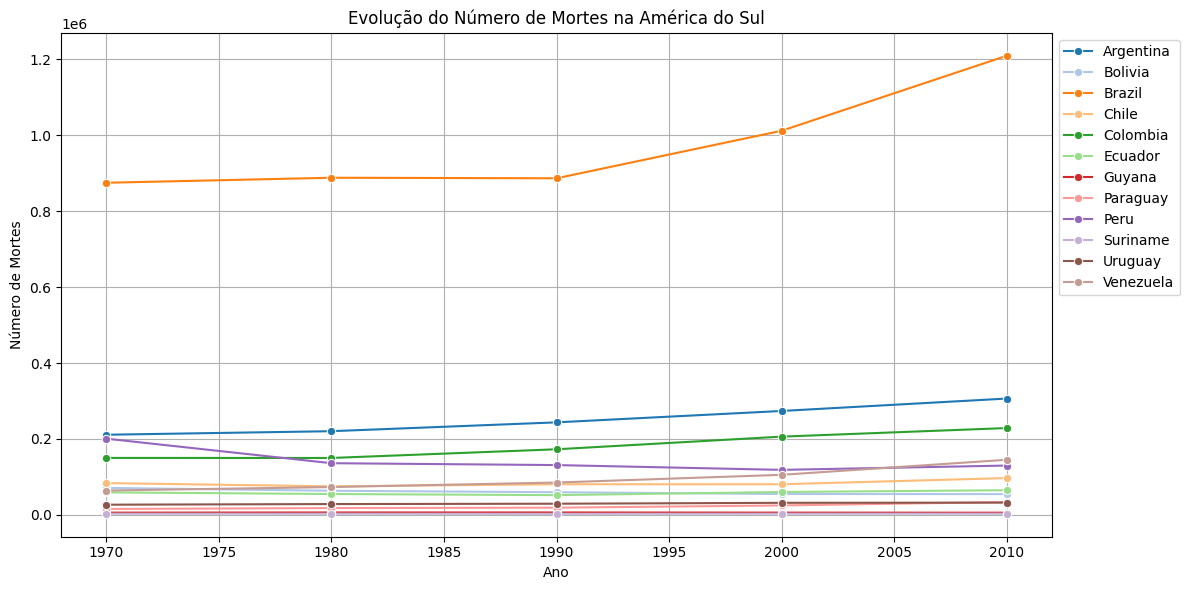

In [19]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=evolucao,
    x='Year',
    y='Number of Deaths',
    hue='Country Name',
    marker='o',
    palette='tab20'
)

plt.title('Evolução do Número de Mortes na América do Sul')
plt.xlabel('Ano')
plt.ylabel('Número de Mortes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


É possível perceber que o Brasil sempre apresentou o maior número de mortes ao longo do período analisado, com um aumento acentuado a partir de 1990. Países como Argentina, Colômbia e Venezuela também registraram um crescimento contínuo no número de óbitos. Um destaque positivo é o Peru, que mostra uma tendência de queda nas mortes ao longo dos anos. Por fim, os demais países não apresentaram variações significativas, mantendo-se relativamente estáveis em relação a essa variável.









## 3. Existem diferenças significativas nas taxas de mortalidade entre homens e mulheres em diferentes grupos etários para os países da América do Sul?

In [20]:
grupo = america_sul.groupby(['Country Name', 'Sex', 'Age Group'])[['Death Rate Per 100,000']].mean().reset_index()
grupo

,Country Name,Sex,Age Group,"Death Rate Per 100,000"
0,Argentina,Female,0-6 days,55991.14
1,Argentina,Female,1-4 years,137.30
2,Argentina,Female,10-14 years,33.84
3,Argentina,Female,15-19 years,61.30
4,Argentina,Female,20-24 years,74.84
...,...,...,...,...
475,Venezuela,Male,65-69 years,2879.76
476,Venezuela,Male,7-27 days,6995.16
477,Venezuela,Male,70-74 years,4321.16
478,Venezuela,Male,75-79 years,6223.20


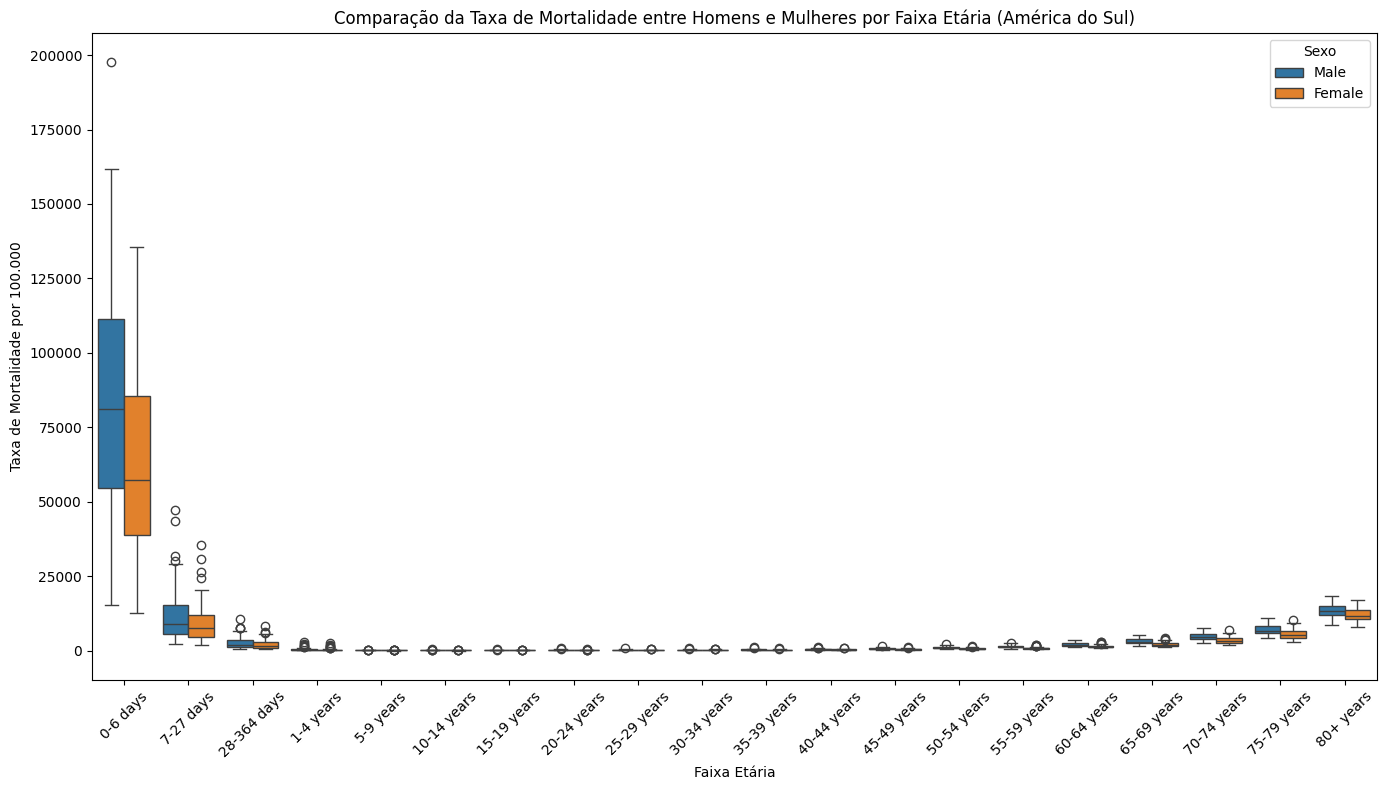

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=america_sul,
    x='Age Group',
    y='Death Rate Per 100,000',
    hue='Sex'
)
plt.title('Comparação da Taxa de Mortalidade entre Homens e Mulheres por Faixa Etária (América do Sul)')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Mortalidade por 100.000')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


É possível observar que, nas faixas etárias iniciais, a taxa de mortalidade é mais acentuada, com uma diferença perceptível entre os gêneros: os homens apresentam uma mediana de mortalidade mais elevada que as mulheres. Durante a infância e a fase adulta, essa diferença de gênero não é tão expressiva, embora haja um aumento gradual na taxa de mortalidade com o avanço da idade. Já a partir dos 60 anos, a diferença volta a se destacar, com os homens apresentando, de forma predominante, taxas medianas de mortalidade superiores às das mulheres.

## 4. Como a taxa de mortalidade por 100.000 indivíduos varia entre diferentes grupos etários dentro do Brasil? Utilize um histograma contendo a distribuição das mortes por ano para cada uma das faixas etárias.

In [22]:
brasil = america_sul.loc[america_sul['Country Name'] == 'Brazil']
brasil.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
7245,BRA,Brazil,1970,0-6 days,Male,52758,161760.0
7246,BRA,Brazil,1970,0-6 days,Female,36142,115954.1
7248,BRA,Brazil,1970,7-27 days,Male,28889,30202.6
7249,BRA,Brazil,1970,7-27 days,Female,24198,26378.9
7251,BRA,Brazil,1970,28-364 days,Male,110478,7502.2


In [23]:
dist_ano = brasil.groupby(['Year','Age Group'])[['Number of Deaths']].sum().reset_index()
dist_ano

,Year,Age Group,Number of Deaths
0,1970,0-6 days,88900
1,1970,1-4 years,69628
2,1970,10-14 years,9294
3,1970,15-19 years,13777
4,1970,20-24 years,16978
...,...,...,...
95,2010,65-69 years,97168
96,2010,7-27 days,7439
97,2010,70-74 years,118027
98,2010,75-79 years,121809


<Figure size 1600x800 with 0 Axes>

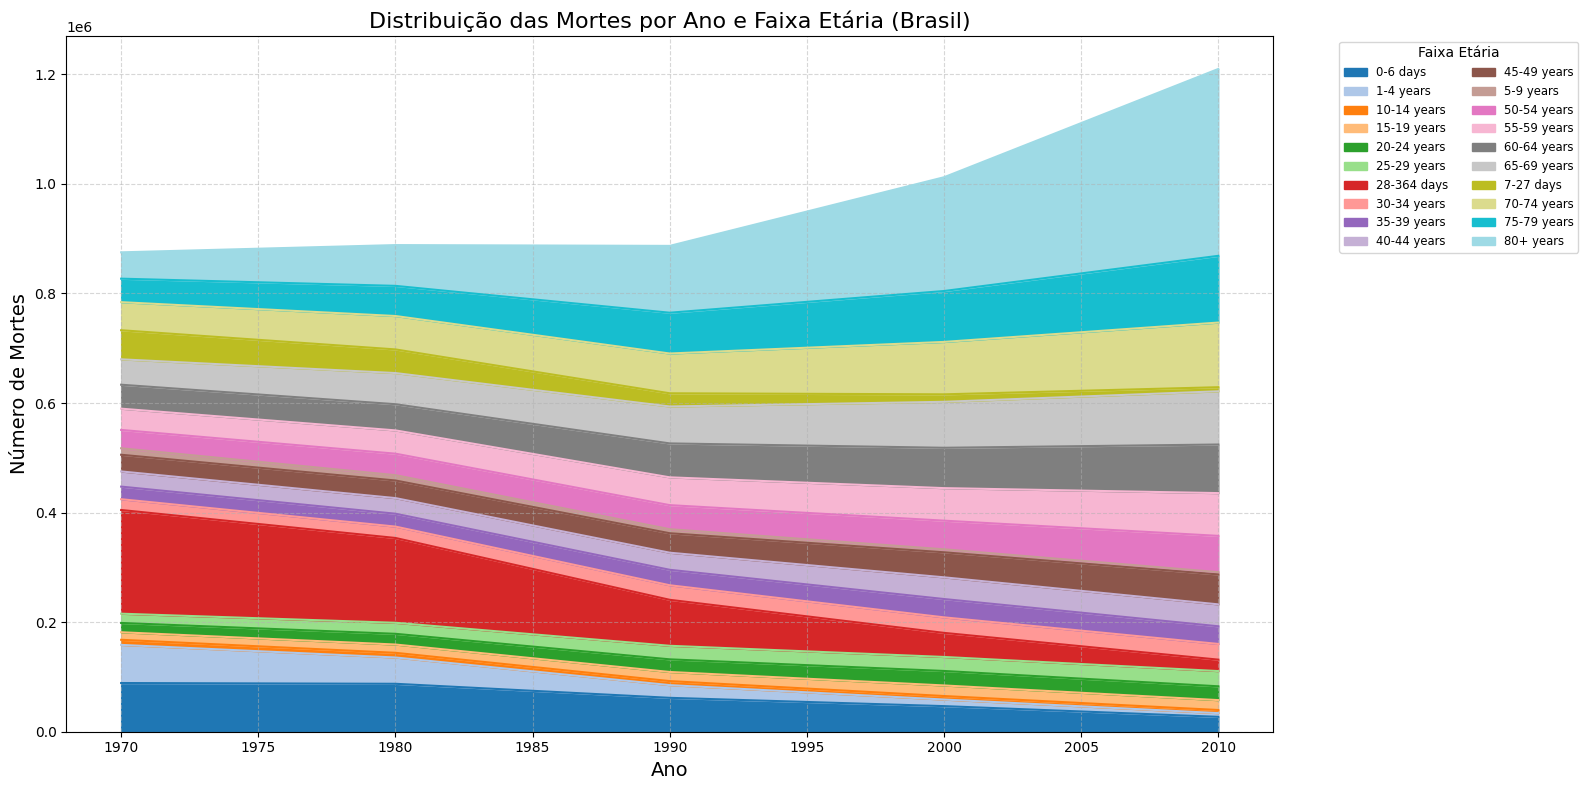

In [24]:
df_plot = dist_ano[dist_ano['Age Group'] != 'All ages']

df_pivot = df_plot.pivot(index='Year', columns='Age Group', values='Number of Deaths')

cores = sns.color_palette("tab20", n_colors=len(df_pivot.columns))

plt.figure(figsize=(16, 8))
df_pivot.plot.area(color=cores, legend=True, figsize=(16, 8))

plt.title('Distribuição das Mortes por Ano e Faixa Etária (Brasil)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Mortes', fontsize=14)
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show();


Nota-se uma queda significativa nas mortes entre crianças e jovens ao longo dos anos, especialmente nas faixas de 0 a 4 anos, indicando avanços na saúde pública e na prevenção de doenças.

Entretanto, há um aumento expressivo nas mortes entre pessoas com 60 anos ou mais, especialmente na faixa de 80+ anos. Isso reflete o envelhecimento da população e o aumento da longevidade. Também é possível observar um crescimento no total de mortes, possivelmente ligado ao aumento populacional.

O gráfico evidencia uma transição demográfica, com a mortalidade se concentrando cada vez mais nas faixas etárias mais avançadas.

## 5. Qual a evolução das mortes por gênero para o Brasil? Trace um gráfico de linhas com cada uma delas representando um dos gêneros ao longo dos anos.

In [25]:
fem_masc = brasil.groupby(['Year','Sex'])[['Number of Deaths']].sum().reset_index()
fem_masc

,Year,Sex,Number of Deaths
0,1970,Female,370432
1,1970,Male,504664
2,1980,Female,367680
3,1980,Male,520670
4,1990,Female,359384
5,1990,Male,527502
6,2000,Female,422183
7,2000,Male,589991
8,2010,Female,520090
9,2010,Male,689754


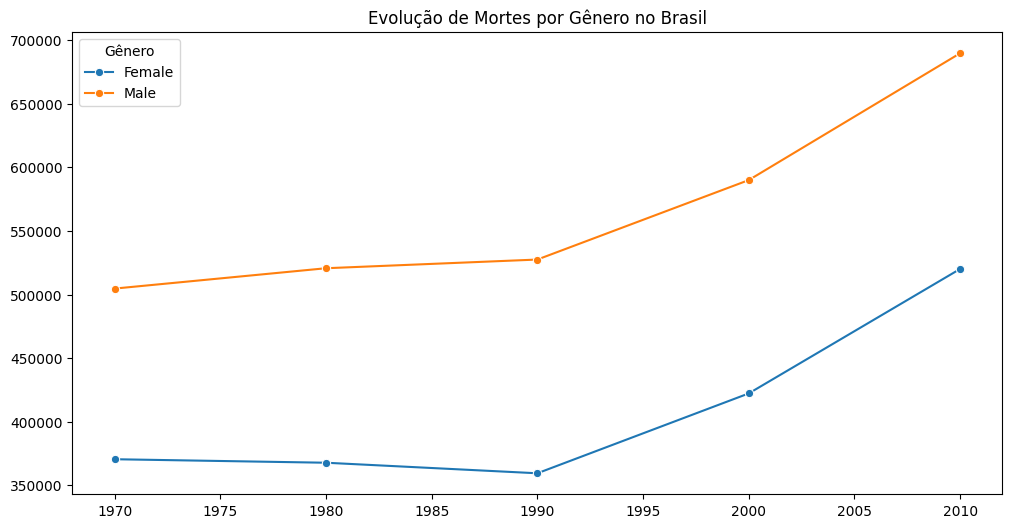

In [26]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=fem_masc, x='Year', y ='Number of Deaths', hue='Sex', marker='o')

plt.title('Evolução de Mortes por Gênero no Brasil')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Gênero')
plt.show()

Claramente é possível notar que o genêro masculino sempre teve um número de mortes maior que o feminino. Interessante notar também que a partir de 1990 ambos tem um comportamento semelhante, crescendo rapidamente o número de mortes, o que não acontece antes de 1990 que o número de mortes no masculino cresce e no feminino diminui.


## 6. Qual grupo etário tem o maior número de mortes no Brasil? Este número é o mesmo quando olhamos para todos os anos em comparação com quando consideramos apenas os últimos 10 anos?

In [27]:
etario = brasil.groupby('Age Group')['Number of Deaths'].sum()
etario = etario.sort_values(ascending=False)
etario

,Number of Deaths
Age Group,
80+ years,793258
28-364 days,492916
70-74 years,398556
75-79 years,387086
65-69 years,351749
60-64 years,315775
0-6 days,312226
55-59 years,269544
50-54 years,235082


In [28]:
brasil['Year'].unique()

array([1970, 1980, 1990, 2000, 2010])

In [29]:
ultimos_10anos = brasil.loc[brasil['Year'] >= 2000]
ultimos_10anos = ultimos_10anos.groupby('Age Group')['Number of Deaths'].sum()
ultimos_10anos = ultimos_10anos.sort_values(ascending=False)
ultimos_10anos

,Number of Deaths
Age Group,
80+ years,548774
75-79 years,214732
70-74 years,213704
65-69 years,181083
60-64 years,162355
55-59 years,137459
50-54 years,118425
45-49 years,100276
40-44 years,79637


Ao analisar as duas tabelas, observa-se que, em geral, pessoas com mais de 80 anos apresentam o maior número de óbitos. É interessante notar que a faixa etária de 28 a 364 dias ocupa a segunda posição na tabela agregada de todos os anos; entretanto, na tabela referente aos últimos 10 anos, essa faixa se posiciona de maneira mais intermediária, possivelmente refletindo os avanços na medicina. Ademais, enquanto na tabela dos últimos 10 anos os maiores números de mortes correspondem às faixas etárias mais elevadas, na tabela completa a distribuição se mostra mais aleatória.

## 7. Qual país apresentou a melhoria mais significativa nas taxas de mortalidade por 100.000 indivíduos ao longo do período analisado?

In [30]:
taxa_media_ano = america_sul.groupby(['Country Name','Year'])[['Death Rate Per 100,000']].mean().reset_index()
taxa_media_ano

,Country Name,Year,"Death Rate Per 100,000"
0,Argentina,1970,8009.8125
1,Argentina,1980,5878.7825
2,Argentina,1990,4969.3625
3,Argentina,2000,3864.3325
4,Argentina,2010,3081.1925
5,Bolivia,1970,13484.2700
6,Bolivia,1980,10531.4100
7,Bolivia,1990,8726.6675
8,Bolivia,2000,7046.1350
9,Bolivia,2010,5960.4250


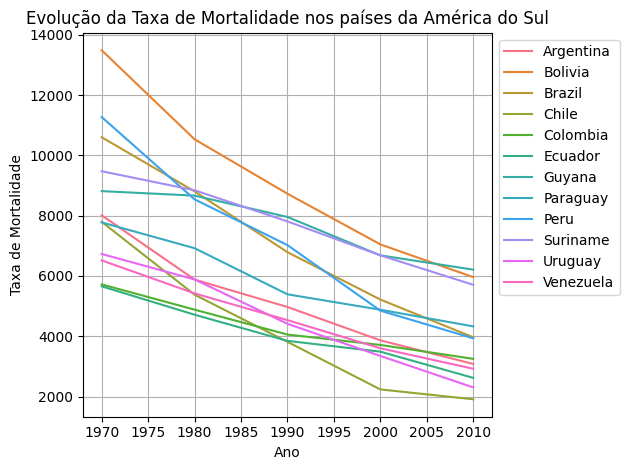

In [31]:
sns.lineplot(data=taxa_media_ano, x='Year', y='Death Rate Per 100,000', hue='Country Name')

plt.title('Evolução da Taxa de Mortalidade nos países da América do Sul')
plt.xlabel('Ano')
plt.ylabel('Taxa de Mortalidade')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()

In [32]:
ano_min = taxa_media_ano['Year'].min()
ano_max = taxa_media_ano['Year'].max()

taxa_min_max = taxa_media_ano[taxa_media_ano['Year'].isin([ano_min, ano_max])]
taxa_min_max


,Country Name,Year,"Death Rate Per 100,000"
0,Argentina,1970,8009.8125
4,Argentina,2010,3081.1925
5,Bolivia,1970,13484.2700
9,Bolivia,2010,5960.4250
10,Brazil,1970,10599.1150
14,Brazil,2010,3964.9950
15,Chile,1970,7793.0525
19,Chile,2010,1909.2725
20,Colombia,1970,5718.9825
24,Colombia,2010,3250.6150


In [36]:
pivot = taxa_min_max.pivot(index='Country Name', columns='Year', values='Death Rate Per 100,000')
pivot['Difference'] = pivot[1970] - pivot[2010]

print(pivot)

Year                1970       2010  Difference
Country Name                                   
Argentina      8009.8125  3081.1925   4928.6200
Bolivia       13484.2700  5960.4250   7523.8450
Brazil        10599.1150  3964.9950   6634.1200
Chile          7793.0525  1909.2725   5883.7800
Colombia       5718.9825  3250.6150   2468.3675
Ecuador        5654.9425  2619.4525   3035.4900
Guyana         8812.9000  6209.0350   2603.8650
Paraguay       7775.0000  4326.5575   3448.4425
Peru          11268.8225  3930.7275   7338.0950
Suriname       9472.1350  5706.2250   3765.9100
Uruguay        6726.9200  2302.9675   4423.9525
Venezuela      6515.2675  2922.1700   3593.0975


In [38]:
pivot_max = pivot['Difference'].max()
print(pivot_max)

7523.845


Assim, o país que apresentou a melhoria mais significativa nas taxas de mortalidade por 100.000 indivíduos entre 1970 e 2010 foi a Bolívia, com uma redução de 7.523,85 mortes por 100.000 habitantes.